In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  #data download

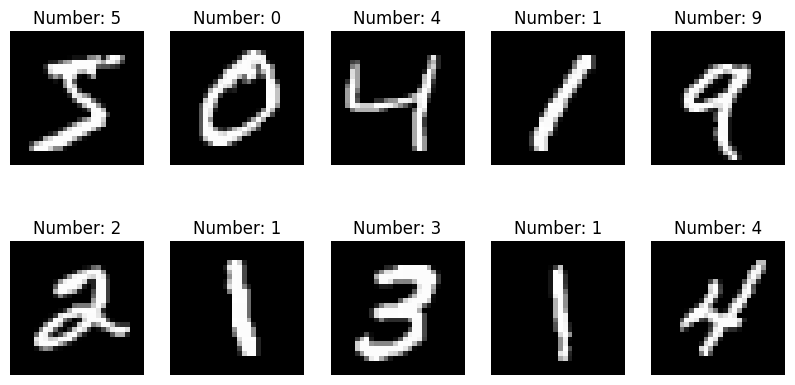

In [3]:
#Visualization of several examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")
    plt.title(f"Number: {y_train[i]}")
plt.show()

In [12]:
x_train = x_train.reshape(x_train.shape[0], -1) #data preparation
x_test = x_test.reshape(x_test.shape[0], -1)

In [37]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)  #model structure

In [39]:
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rnd_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) #learning results

print(f"RandomForest accuracy on MNIST: {accuracy}")

RandomForest accuracy on MNIST: 0.9705


In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
param_dist = {  #tree parameters
    "n_estimators": np.arange(100, 500, 50),
    "max_depth": np.arange(10, 50, 10),
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 5),
}

In [15]:
rnd_clf = RandomForestClassifier()

In [16]:
random_search = RandomizedSearchCV(rnd_clf, param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

In [18]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, verbose=2)

In [19]:
best_rf = random_search.best_estimator_

In [20]:
y_pred = best_rf.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)

print(f"RandomForest accuracy on MNIST: {accuracy}") #The result has not improved

RandomForest accuracy on MNIST: 0.97


In [ ]:
#best parameters for the model
#rnd_clf = RandomForestClassifier(max_depth=np.int64(20), min_samples_leaf=np.int64(1),
#                       min_samples_split=np.int64(4),
#                       n_estimators=np.int64(400))

In [8]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {
    "n_estimators": np.arange(100, 500, 50),
    "max_depth": np.arange(5, 30, 5),
    "min_samples_split": np.arange(2, 6, 2),
    "min_samples_leaf": np.arange(1, 5, 1),
}

In [14]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)

In [15]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             verbose=2)

In [17]:
best_rf = grid_search.best_estimator_

In [18]:
y_pred = best_rf.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)

print(f"RandomForest accuracy on MNIST: {accuracy}")

RandomForest accuracy on MNIST: 0.9707
